In [2]:
!pip install scikit-learn

In [110]:
#import libraires

import pandas as pd
import matplotlib.plot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib.plot'

In [111]:
f_birth = pd.read_csv("C:/Users/ASUS/Downloads/daily-total-female-births-in-cal.csv",index_col=[0])

In [112]:
f_birth.head()              #head starting values

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [113]:
type(f_birth)                  # types 

pandas.core.frame.DataFrame

In [114]:
series_value = f_birth.values

In [12]:
type(series_value)             #type of series_value

numpy.ndarray

In [13]:
f_birth.size                  #value size

366

In [14]:
f_birth.tail()               #bottom values

,"Daily total female births in California, 1959"
Date,
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50
Daily total female births in California,1959


In [15]:
f_birth.describe()             #data describes

,"Daily total female births in California, 1959"
count,366.000000
mean,47.218579
std,100.472534
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,1959.000000


In [16]:
f_birth = f_birth[0:365]

In [17]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<Axes: xlabel='Date'>

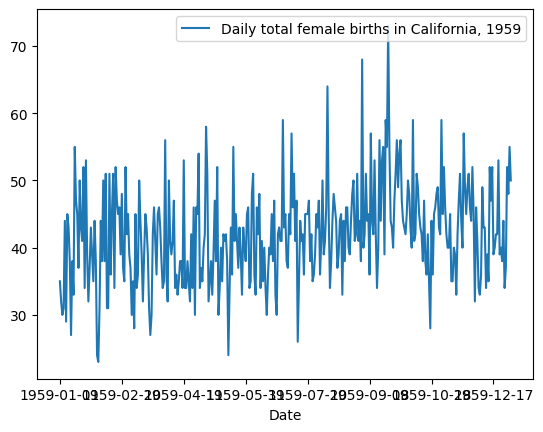

In [18]:
f_birth.plot()                        #plot hepls to see the data clearly

In [19]:
f_birth_mean = f_birth.rolling(window = 20).mean()

<Axes: xlabel='Date'>

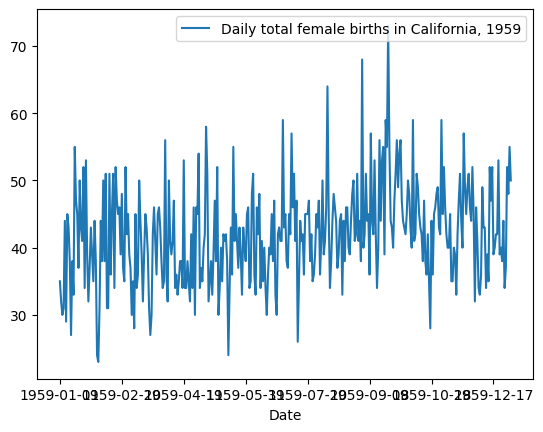

In [20]:
f_birth.plot()

<Axes: xlabel='Date'>

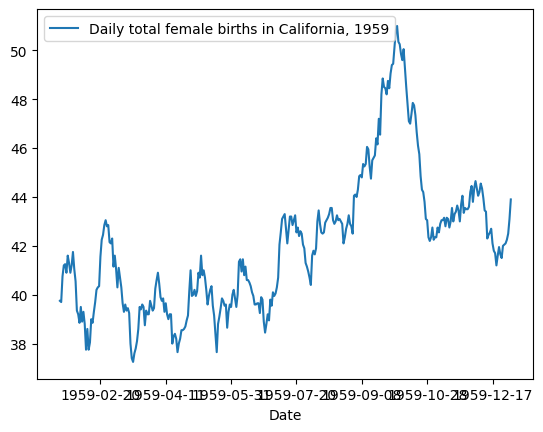

In [21]:
f_birth_mean.plot() 

In [22]:
value = pd.DataFrame(series_value)

In [23]:
birth_df = pd.concat([value,value.shift(1)],axis=1)

In [24]:
birth_df.columns = ["Actual_birth","Forecast_birth"]

In [25]:
birth_df.head()

,Actual_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np                                              #import numpy and mean_squared_error

In [27]:
birth_test = birth_df[1:]

In [28]:
birth_test.head()

,Actual_birth,Forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [37]:
birth_test = birth_test[0:364]

In [38]:
birth_test.tail()

,Actual_birth,Forecast_birth
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [39]:
birth_error = mean_squared_error(birth_test.Actual_birth,birth_test.Forecast_birth)

In [40]:
birth_error

84.4297520661157

In [41]:
np.sqrt(birth_error)

np.float64(9.188566377086019)

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

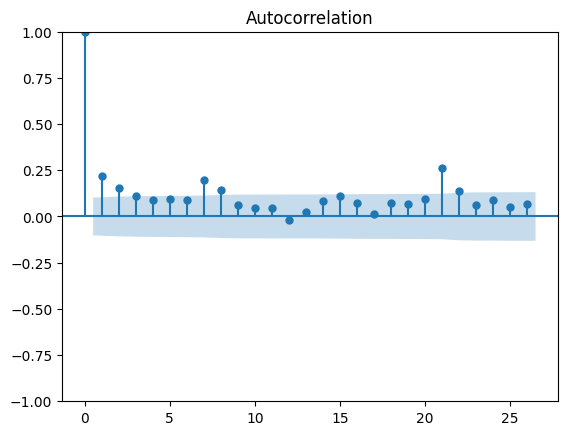

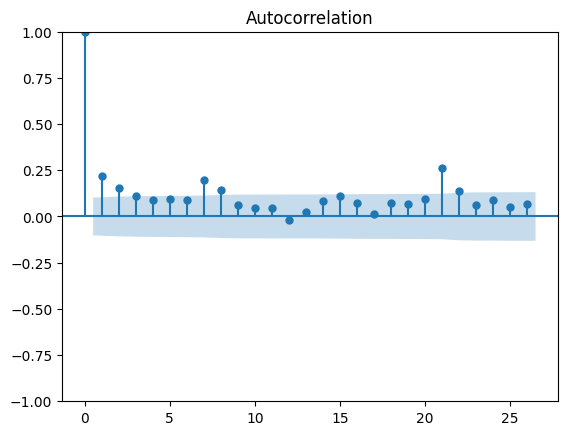

In [44]:
#plot acf is to identify the parameter Q
#AIRMA (p,d,q)
plot_acf(f_birth)    # identify the value of Q

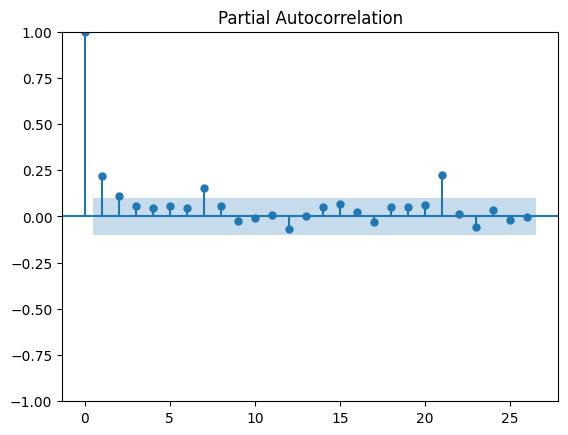

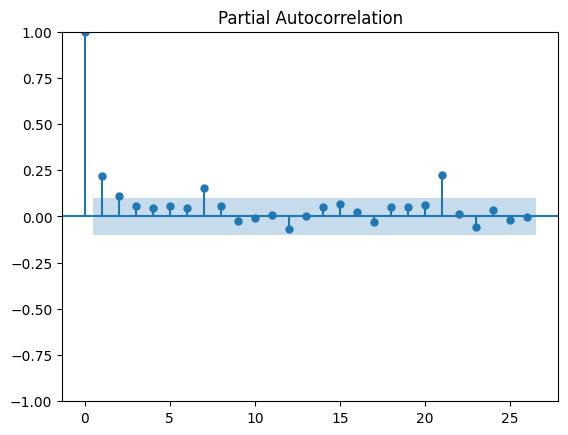

In [45]:
plot_pacf(f_birth)          # identify the value of P

In [47]:
#p=2,3   d=0   q=3,4
f_birth.size

365

In [48]:
birth_train = f_birth[0:330]
birth_test = f_birth[330:365]

In [49]:
birth_train.size

330

In [92]:
from statsmodels.tsa.arima.model import ARIMA

In [93]:
birth_model = ARIMA(birth_train,order = (1,1,1))

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [94]:
birth_model_fit = birth_model.fit()

In [95]:
birth_model_fit.aic

np.float64(2228.0930224380127)

In [106]:
birth_forecast = birth_model_fit.forecast(steps=len(birth_test))  # ✅ full forecast


In [107]:
birth_forecast

1959-11-27    44.948175
1959-11-28    44.503403
1959-11-29    44.454580
1959-11-30    44.449221
1959-12-01    44.448633
1959-12-02    44.448568
1959-12-03    44.448561
1959-12-04    44.448560
1959-12-05    44.448560
1959-12-06    44.448560
1959-12-07    44.448560
1959-12-08    44.448560
1959-12-09    44.448560
1959-12-10    44.448560
1959-12-11    44.448560
1959-12-12    44.448560
1959-12-13    44.448560
1959-12-14    44.448560
1959-12-15    44.448560
1959-12-16    44.448560
1959-12-17    44.448560
1959-12-18    44.448560
1959-12-19    44.448560
1959-12-20    44.448560
1959-12-21    44.448560
1959-12-22    44.448560
1959-12-23    44.448560
1959-12-24    44.448560
1959-12-25    44.448560
1959-12-26    44.448560
1959-12-27    44.448560
1959-12-28    44.448560
1959-12-29    44.448560
1959-12-30    44.448560
1959-12-31    44.448560
Freq: D, Name: predicted_mean, dtype: float64

In [104]:
birth_test

,"Daily total female births in California, 1959"
Date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [108]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

np.float64(6.661571736909478)